In [1]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [7]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', ['id', 'abstract', 'categories', 'comments'])

In [3]:
data.head()

,id,abstract,categories,comments
0,0704.0001,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version"
1,0704.0002,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,To appear in Graphs and Combinatorics
2,0704.0003,The evolution of Earth-Moon system is descri...,physics.gen-ph,"23 pages, 3 figures"
3,0704.0004,We show that a determinant of Stirling cycle...,math.CO,11 pages
4,0704.0005,In this paper we show how to compute the $\L...,math.CA math.FA,None


In [8]:
pat = '(\d+) pages'
data['pages'] = data['comments'].str.extract(pat)

In [9]:
data.head()

,id,abstract,categories,comments,pages
0,0704.0001,A fully differential calculation in perturba...,hep-ph,"37 pages, 15 figures; published version",37
1,0704.0002,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG,To appear in Graphs and Combinatorics,NaN
2,0704.0003,The evolution of Earth-Moon system is descri...,physics.gen-ph,"23 pages, 3 figures",23
3,0704.0004,We show that a determinant of Stirling cycle...,math.CO,11 pages,11
4,0704.0005,In this paper we show how to compute the $\L...,math.CA math.FA,None,NaN


In [22]:
data['pages'].dropna().astype(int).describe().astype(int)

count    1089208
mean          17
std           22
min            0
25%            8
50%           13
75%           22
max        11232
Name: pages, dtype: int64

In [23]:
data.loc[data.pages == '0']

,id,abstract,categories,comments,pages
166453,1001.1165,"In this paper, we obtain an exact formula fo...",cond-mat.str-el cond-mat.supr-con,"4.0 pages + supplementary material, published ...",0
169447,1001.4159,We propose a simple three-body model of an a...,quant-ph physics.atom-ph,"0 pages, 10 figures, to be published in Phys. ...",0
345355,1205.6354,A Coulomb impurity placed in an undoped Weyl...,cond-mat.mes-hall hep-th nucl-th,"4+0 pages, extra references added",0
375597,1210.1803,A Coulomb impurity placed in an undoped Weyl...,cond-mat.mes-hall hep-th,"4+0 pages, 1 figure, generalization of arXiv:1...",0
410837,1302.6497,B. Szegedy [Edge coloring models and reflect...,math.CO math.AG,Some typos and inconsistencies have been fixed...,0
690898,1512.08246,Undoped bilayer graphene is a two-dimensiona...,cond-mat.mes-hall,"4+0 pages, 1 figure, minor changes, version to...",0
864925,1706.10190,An noise-induced mechanism has been revealed...,cond-mat.stat-mech,0 pages,0
1082942,1902.01858,The nature and the very existence of the res...,cond-mat.str-el cond-mat.mes-hall,"13 + 0 pages, 11 figures. Minor corrections to...",0
1442358,astro-ph/9408103,We present a general formalism for computing...,astro-ph gr-qc,35 RevTeX 3.0 pages without 9 figures. Full po...,0
1480807,cond-mat/0207305,The theoretical study of spin diffusion in d...,cond-mat.str-el cond-mat.mtrl-sci,"4.0 pages, 3 figures, RevTeX 4, replaced with ...",0


In [40]:
# 数据整理一下
data_copy = data.copy()
data_copy['pages'] = data_copy['pages'].astype('float')

In [29]:
data_copy['categories'] = data_copy['categories'].apply(lambda x: x.split(' ')[0])
data_copy['categories'] = data_copy['categories'].apply(lambda x: x.split('.')[0])

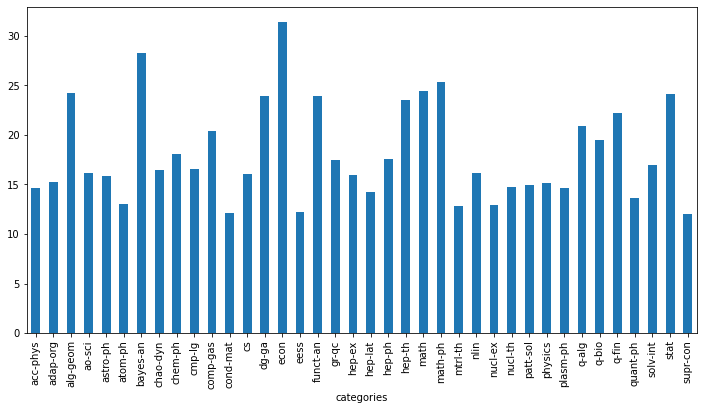

In [30]:
# 每类论文的平均页数
plt.figure(figsize=(12, 6))
data_copy.groupby(['categories'])['pages'].mean().plot(kind='bar')
plt.show()

In [31]:
pat = '(\d+) figures'
data['figures'] = data['comments'].str.extract(pat)

In [32]:
data['figures'] = data['figures'].astype('float')

In [38]:
data['figures'].describe().astype(int)

count    647811
mean          7
std          10
min           0
25%           4
50%           6
75%           9
max        4989
Name: figures, dtype: int64

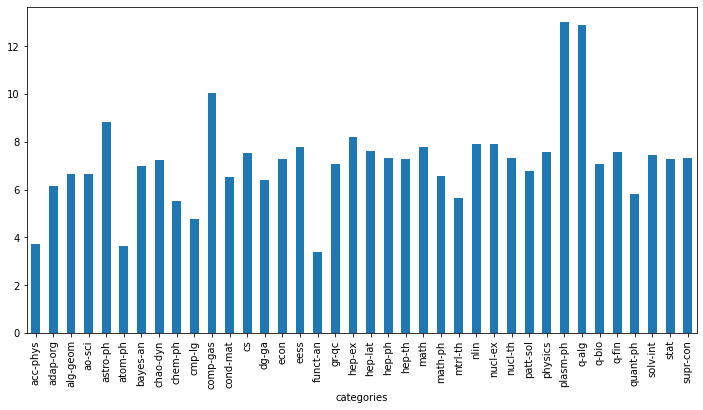

In [41]:
# 每类论文的平均图数
plt.figure(figsize=(12, 6))
data_copy.groupby(['categories'])['figures'].mean().plot(kind='bar')
plt.show()

In [35]:
# 筛选包含github的论文
data_with_code = data[
    (data.comments.str.contains('github')==True)|
                      (data.abstract.str.contains('github')==True)
]
data_with_code['text'] = data_with_code['abstract'].fillna('') + data_with_code['comments'].fillna('')

# 使用正则表达式匹配论文
pattern = '[a-zA-z]+://github[^\s]*'
data_with_code['code_flag'] = data_with_code['text'].str.findall(pattern).apply(len)

<ipython-input-35-682f0b795832>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_code['text'] = data_with_code['abstract'].fillna('') + data_with_code['comments'].fillna('')
<ipython-input-35-682f0b795832>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_code['code_flag'] = data_with_code['text'].str.findall(pattern).apply(len)


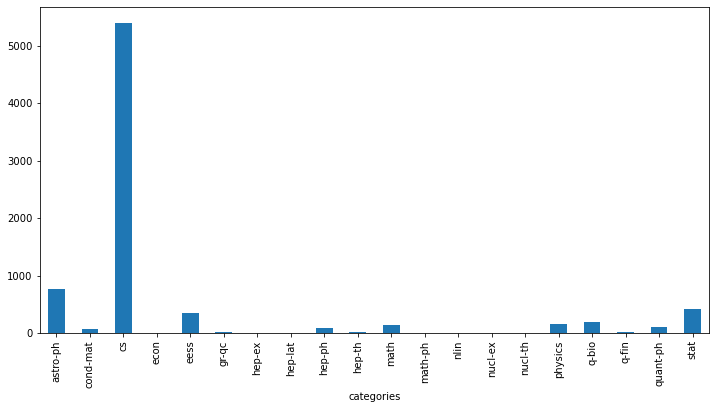

In [37]:
data_with_code = data_with_code[data_with_code['code_flag'] == 1]
plt.figure(figsize=(12, 6))
data_with_code.groupby(['categories'])['code_flag'].count().plot(kind='bar')
plt.show()